In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look cleaner
sns.set()

Matplotlib is building the font cache; this may take a moment.


In [24]:
# Load Dataset

df = pd.read_csv("/Users/salehalzahrani/Downloads/Coffee Sales.csv")

# Display first 5 rows
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Karen Clark,China,Organic Fair Trade,19/02/2022,"$39,199.64",413
1,Daniel Lee,USA,Arabica Dark Roast,16/11/2022,"$5,214.27",152
2,Daniel Lee,China,Robusta Medium,02/10/2023,"$26,553.48",325
3,John Doe,Australia,Breakfast Blend,21/04/2022,"$14,547.43",370
4,Laura Martinez,UK,French Roast,13/04/2023,"$15,270.04",156


In [25]:
# Check all values
print(df.isna())

     Sales Person  Country  Product   Date  Amount  Boxes Shipped
0           False    False    False  False   False          False
1           False    False    False  False   False          False
2           False    False    False  False   False          False
3           False    False    False  False   False          False
4           False    False    False  False   False          False
..            ...      ...      ...    ...     ...            ...
195         False    False    False  False   False          False
196         False    False    False  False   False          False
197         False    False    False  False   False          False
198         False    False    False  False   False          False
199         False    False    False  False   False          False

[200 rows x 6 columns]


In [26]:
print(df.isna().sum())

Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64


In [27]:
# checking duplicate rows
df.duplicated()[df.duplicated()==True]

Series([], dtype: bool)

In [28]:
# finding number of rows and columns

print("Shape (rows, columns): ", df.shape,"\n")

print("number of rows: ", df.shape[0])
print("number of columns: ", df.shape[1])

Shape (rows, columns):  (200, 6) 

number of rows:  200
number of columns:  6


In [29]:
# viewing the data types of columns
df.dtypes

Sales Person       str
Country            str
Product            str
Date               str
Amount             str
Boxes Shipped    int64
dtype: object

In [30]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Amount'] = df['Amount'].replace(r'[$,]', '', regex=True)
df['Amount'] = pd.to_numeric(df['Amount'])

df.dtypes

/var/folders/2l/svml0mzn2kx5lpnv4d634vf00000gn/T/ipykernel_55309/41957113.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


Sales Person                str
Country                     str
Product                     str
Date             datetime64[us]
Amount                  float64
Boxes Shipped             int64
dtype: object

In [33]:
df.describe(include='all')

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
count,200,200,200,200,200.000000,200.000000
unique,20,10,10,NaN,NaN,NaN
top,Nancy Allen,China,Arabica Dark Roast,NaN,NaN,NaN
freq,19,27,27,NaN,NaN,NaN
mean,NaN,NaN,NaN,2022-12-29 21:50:24,14311.390250,229.975000
min,NaN,NaN,NaN,2022-01-01 00:00:00,248.180000,10.000000
25%,NaN,NaN,NaN,2022-07-23 00:00:00,6495.060000,124.250000
50%,NaN,NaN,NaN,2022-11-19 00:00:00,12783.845000,222.000000
75%,NaN,NaN,NaN,2023-07-08 06:00:00,20806.362500,329.250000
max,NaN,NaN,NaN,2023-12-29 00:00:00,47138.940000,496.000000


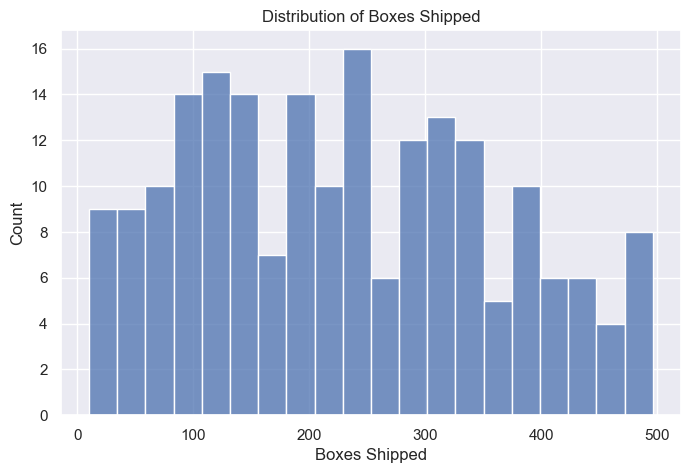

In [34]:
plt.figure(figsize=(8,5))
sns.histplot(df['Boxes Shipped'], bins=20)
plt.title("Distribution of Boxes Shipped")
plt.show()

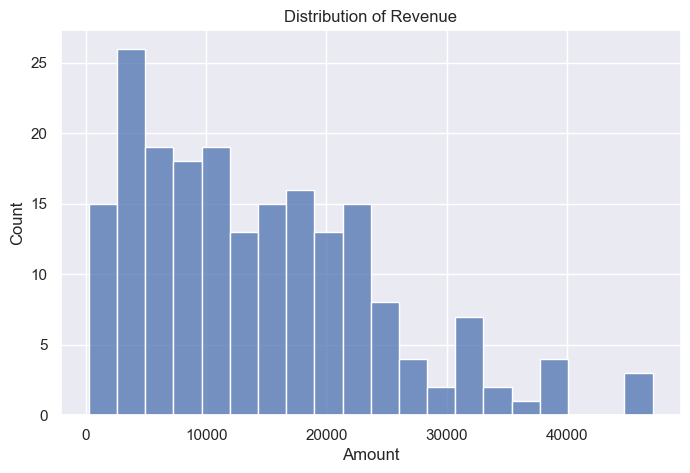

In [35]:
plt.figure(figsize=(8,5))
sns.histplot(df['Amount'], bins=20)
plt.title("Distribution of Revenue")
plt.show()

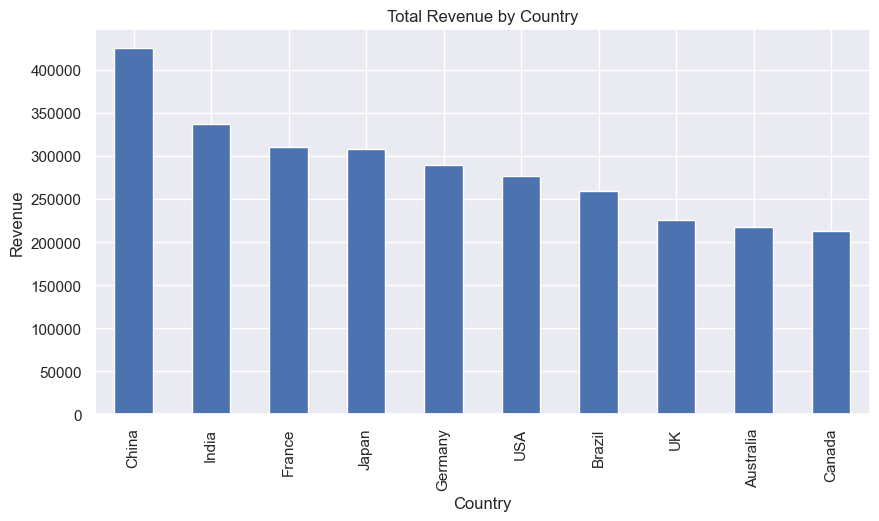

Country
China        425375.93
India        337176.48
France       310308.50
Japan        307512.70
Germany      289091.10
USA          277036.30
Brazil       259488.93
UK           225681.34
Australia    217303.34
Canada       213303.43
Name: Amount, dtype: float64

In [36]:
country_revenue = df.groupby('Country')['Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
country_revenue.plot(kind='bar')
plt.title("Total Revenue by Country")
plt.ylabel("Revenue")
plt.show()

country_revenue

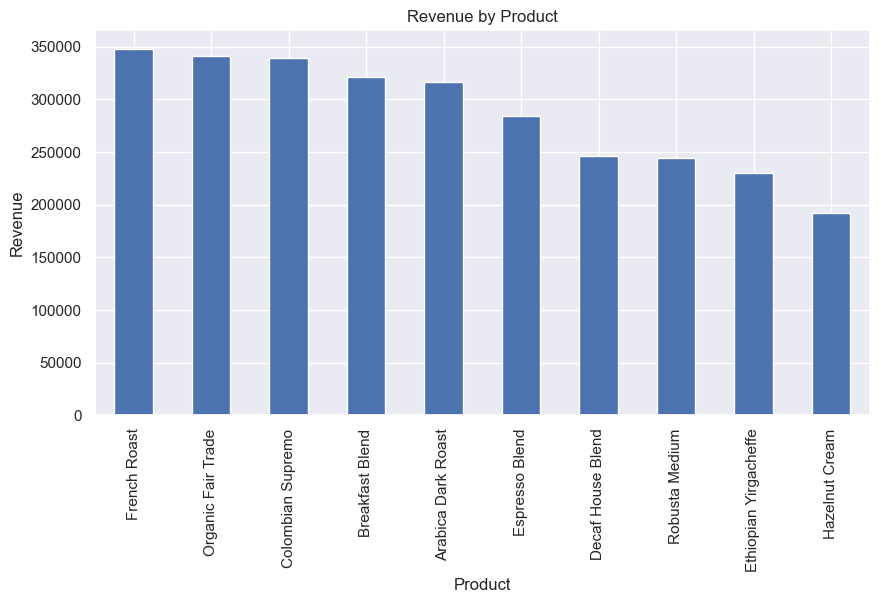

Product
French Roast             348012.29
Organic Fair Trade       341007.73
Colombian Supremo        339418.17
Breakfast Blend          321158.80
Arabica Dark Roast       316150.40
Espresso Blend           284015.66
Decaf House Blend        245861.48
Robusta Medium           244548.12
Ethiopian Yirgacheffe    229835.57
Hazelnut Cream           192269.83
Name: Amount, dtype: float64

In [37]:
product_revenue = df.groupby('Product')['Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
product_revenue.plot(kind='bar')
plt.title("Revenue by Product")
plt.ylabel("Revenue")
plt.show()

product_revenue

In [38]:
salesperson_revenue = df.groupby('Sales Person')['Amount'].sum().sort_values(ascending=False)

salesperson_revenue.head(10)

Sales Person
Nancy Allen       288232.50
Jessica Garcia    250540.30
Matthew Walker    188607.08
Laura Martinez    187181.32
George Young      167862.33
Sarah Taylor      163860.49
Lisa Lewis        161120.59
John Doe          159209.01
David Anderson    143784.55
Karen Clark       143305.31
Name: Amount, dtype: float64

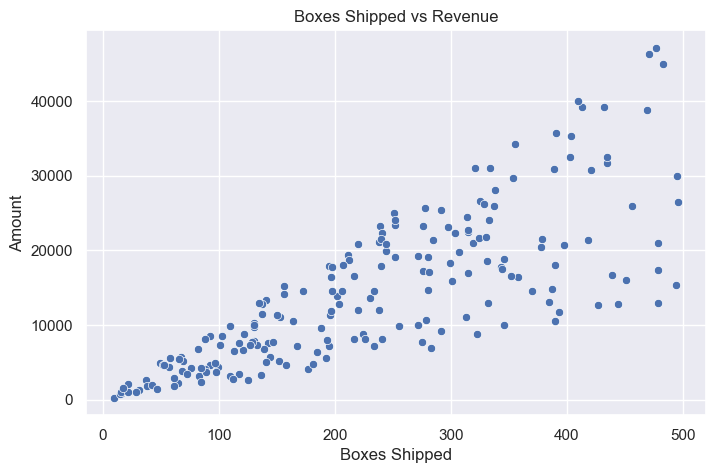

In [39]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Boxes Shipped', y='Amount', data=df)
plt.title("Boxes Shipped vs Revenue")
plt.show()

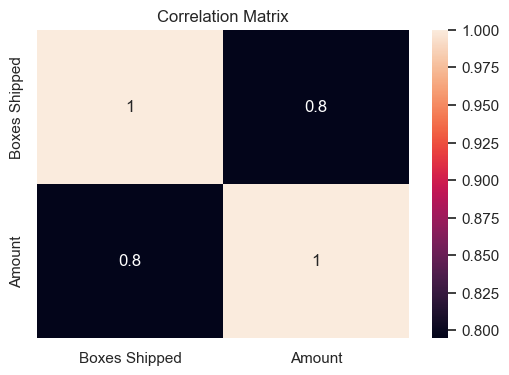

In [40]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['Boxes Shipped', 'Amount']].corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

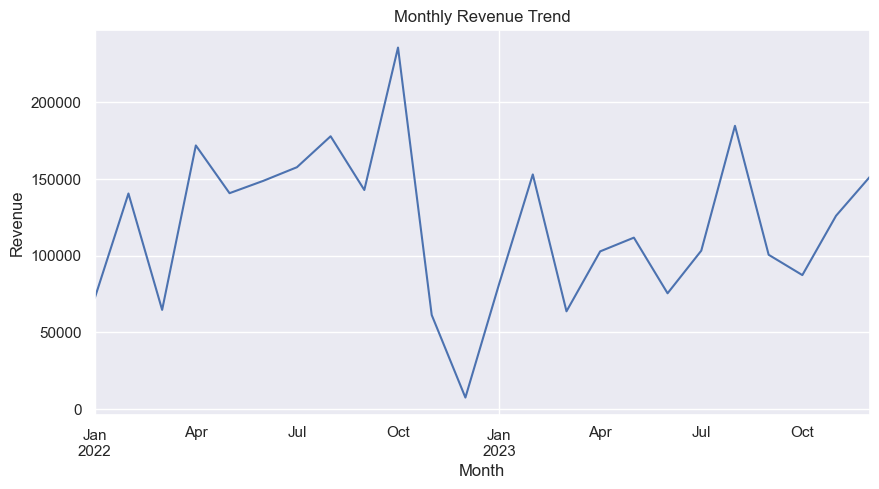

In [41]:
df['Month'] = df['Date'].dt.to_period('M')

monthly_revenue = df.groupby('Month')['Amount'].sum()

plt.figure(figsize=(10,5))
monthly_revenue.plot()
plt.title("Monthly Revenue Trend")
plt.ylabel("Revenue")
plt.show()